In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display, FileLink
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import mode, skew, kurtosis
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from sklearn import preprocessing
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import Initializer
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
class Sivanandam(Initializer):
    def __init__(self, pm):
        self.pm = pm

    def __call__(self, shape, dtype=None):
        limit = 3 / np.sqrt(self.pm)
        return np.random.uniform(-limit, limit, size=shape)

In [4]:
link1 = 'https://raw.githubusercontent.com/Fairtexas5/Rainfall/main/Whole_data/old_dataset.csv'
link2 = 'https://raw.githubusercontent.com/Fairtexas5/Rainfall/main/Whole_data/New_data_2010.csv'
link3 = 'https://raw.githubusercontent.com/Fairtexas5/Rainfall/main/Whole_data/New_data_2016.csv'

data2 = pd.read_csv(link2)


In [5]:
BP_data = [5, 6, 7, 8, 9]
def Maker_dataset(dataset, name):
    for i, BP in enumerate(name):
        num_cols = BP_data[i]
        for j in range(num_cols+1):
            BP[f't-{num_cols - j}'] = (dataset[j:140 - num_cols + j] * 10).reset_index(drop=True)

        BP.reset_index(drop=True, inplace=True)

In [6]:
dataset = data2

july_column = dataset['JUL']

JUL_BP1 = pd.DataFrame()
JUL_BP2 = pd.DataFrame()
JUL_BP3 = pd.DataFrame()
JUL_BP4 = pd.DataFrame()
JUL_BP5 = pd.DataFrame()

July_Data_all = [JUL_BP1, JUL_BP2, JUL_BP3, JUL_BP4, JUL_BP5]

# Generate data for each month
Maker_dataset(july_column, July_Data_all)

for i in range(5):
    print(f"BP{i+1}:\n", July_Data_all[i].tail())


print(July_Data_all[0].count)
print(July_Data_all[1].count)
print(July_Data_all[2].count)
print(July_Data_all[3].count)
print(July_Data_all[4].count)


BP1:
         t-5     t-4     t-3     t-2     t-1     t-0
130  2680.0  1213.0  2931.0  2180.0  2970.0  2851.0
131  1213.0  2931.0  2180.0  2970.0  2851.0  2796.0
132  2931.0  2180.0  2970.0  2851.0  2796.0  2444.0
133  2180.0  2970.0  2851.0  2796.0  2444.0  2688.0
134  2970.0  2851.0  2796.0  2444.0  2688.0  2915.0
BP2:
         t-6     t-5     t-4     t-3     t-2     t-1     t-0
129  2570.0  2680.0  1213.0  2931.0  2180.0  2970.0  2851.0
130  2680.0  1213.0  2931.0  2180.0  2970.0  2851.0  2796.0
131  1213.0  2931.0  2180.0  2970.0  2851.0  2796.0  2444.0
132  2931.0  2180.0  2970.0  2851.0  2796.0  2444.0  2688.0
133  2180.0  2970.0  2851.0  2796.0  2444.0  2688.0  2915.0
BP3:
         t-7     t-6     t-5     t-4     t-3     t-2     t-1     t-0
128  2499.0  2570.0  2680.0  1213.0  2931.0  2180.0  2970.0  2851.0
129  2570.0  2680.0  1213.0  2931.0  2180.0  2970.0  2851.0  2796.0
130  2680.0  1213.0  2931.0  2180.0  2970.0  2851.0  2796.0  2444.0
131  1213.0  2931.0  2180.0  2970.0  2

In [11]:
# def normalize_data(X, min_val, max_val):
#     return (X - min_val) / (max_val - min_val)

# # Function to denormalize predictions
# def denorm_values(y, min_val, max_val):
#     # predictions = pred * (max_val[column] - min_val[column]) + min_val[column]
#     true_val = y * (max_val - min_val) + min_val
#     return true_val

# def split_by_year(X, y, split_index):
#     # Sequentially split the data
#     X_train, X_test = X[:split_index], X[split_index:]
#     y_train, y_test = y[:split_index], y[split_index:]

#     return X_train, X_test, y_train, y_test

# def split_index(X, y, cond, split_year=2777):
#     split_index = dataset[dataset.iloc[:, -1] == split_year].index[0] + 1 + cond // 6
#     return split_index

In [7]:
# np.random.seed(2)
# tf.random.set_seed(2)

# # Define the number of layers and load the dataset
# Layers = 5
# BP = 1
# dataset = July_Data_all[BP-1]

# # Prepare the input features and labels
# X = dataset.iloc[:, 1:Layers+2].values


# y_tic = X[:, Layers]
# X_tic = X[:, 0:Layers]

# Split_index = split_index(X_tic, y_tic, cond=BP)

# min_values = dataset.iloc[:, 1:Layers+2].min()
# max_values = dataset.iloc[:, 1:Layers+2].max()

# max_value1 = X.min()

# # X = normalize_data(X, min_values[-1], max_values[-1])

# X_train, X_test, y_train, y_test = split_by_year(X_tic, y_tic, Split_index)
# print("X train:",X_train)
# print("y train:",y_train)
# print("X test:",X_test)
# print("y test:",y_test)
# # y = X[:, Layers]
# # X= X[:, 0:Layers]

# # # years = list(range(1876, 2011))  # Creates a list of years from 1876 to 2010


# # X = X.reshape((X.shape[0], 1, X.shape[1]))

# # X_train, X_test, y_train, y_test = split_by_year(X, y, years, Split_index)


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 2121.6919874535834
Mean Predicted: 2133.284912109375
SD Observed: 119.15763956559634
SD Predicted: 117.12088012695312
Correlation Coefficient (CC): 0.9966999997486452
Root Mean Squared Error (RMSE): 15.187549077780663
Percentage Bias (PP): -0.5463999828601543%

Testing Data:
Mean Observed: 2120.7916322647798
Mean Predicted: 2131.9736328125
SD Observed: 118.56404087602206
SD Predicted: 118.46285247802734
Correlation Coefficient (CC): 0.9876091787026531
Root Mean Squared Error (RMSE): 21.751136977676545
Percentage Bias (PP): -0.5272559726095792%


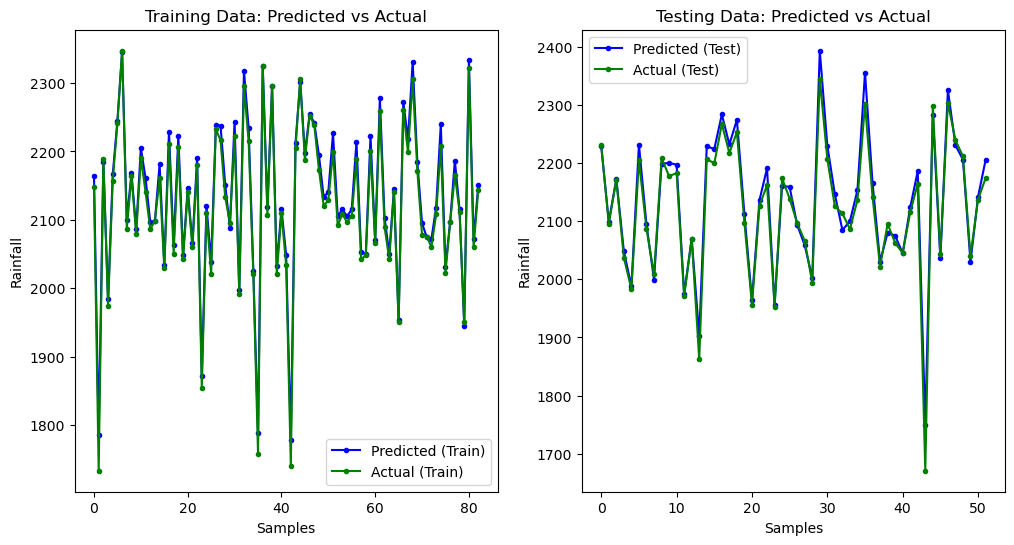

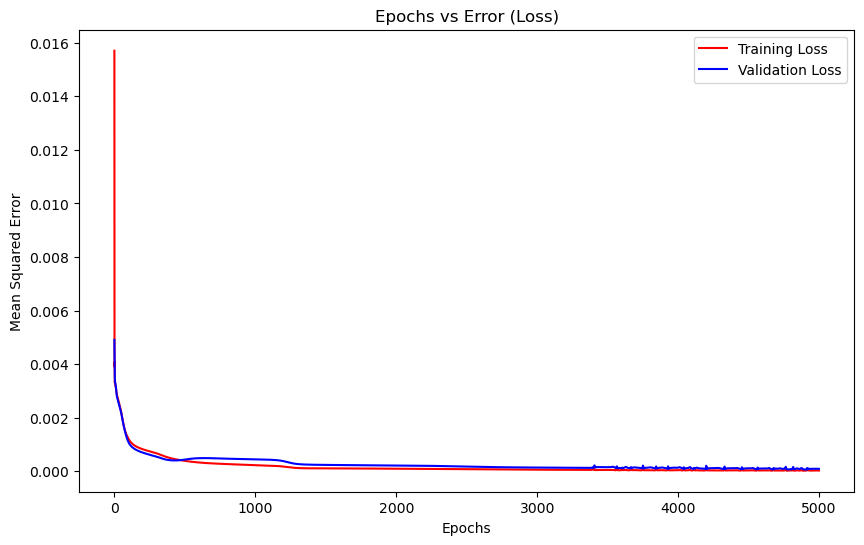

In [10]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 5
dataset = July_Data_all[0]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5000,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp1_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp1_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp1_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp1_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp1_predictions_train)
mean_act_train = np.mean(bp1_actual_train)
sd_pred_train = np.std(bp1_predictions_train)
sd_act_train = np.std(bp1_actual_train)
cc_train = np.corrcoef(bp1_predictions_train.flatten(), bp1_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp1_predictions_train - bp1_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp1_predictions_test)
mean_act_test = np.mean(bp1_actual_test)
sd_pred_test = np.std(bp1_predictions_test)
sd_act_test = np.std(bp1_actual_test)
cc_test = np.corrcoef(bp1_predictions_test.flatten(), bp1_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp1_predictions_test - bp1_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp1_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp1_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp1_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp1_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


In [15]:
print(bp1_predictions_train.shape)
print(bp1_predictions_test.shape)

(85,)
(50,)


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training Data:
Mean Observed: 2054.805434140083
Mean Predicted: 2057.154052734375
SD Observed: 109.2783872943144
SD Predicted: 104.77705383300781
Correlation Coefficient (CC): 0.9865978458948045
Root Mean Squared Error (RMSE): 18.23962441425848
Percentage Bias (PP): -0.11429883118227664%

Testing Data:
Mean Observed: 2051.195622819661
Mean Predicted: 2053.990478515625
SD Observed: 110.51569685508159
SD Predicted: 108.60637664794922
Correlation Coefficient (CC): 0.9656108884430797
Root Mean Squared Error (RMSE): 28.930629786143804
Percentage Bias (PP): -0.1362549561275955%


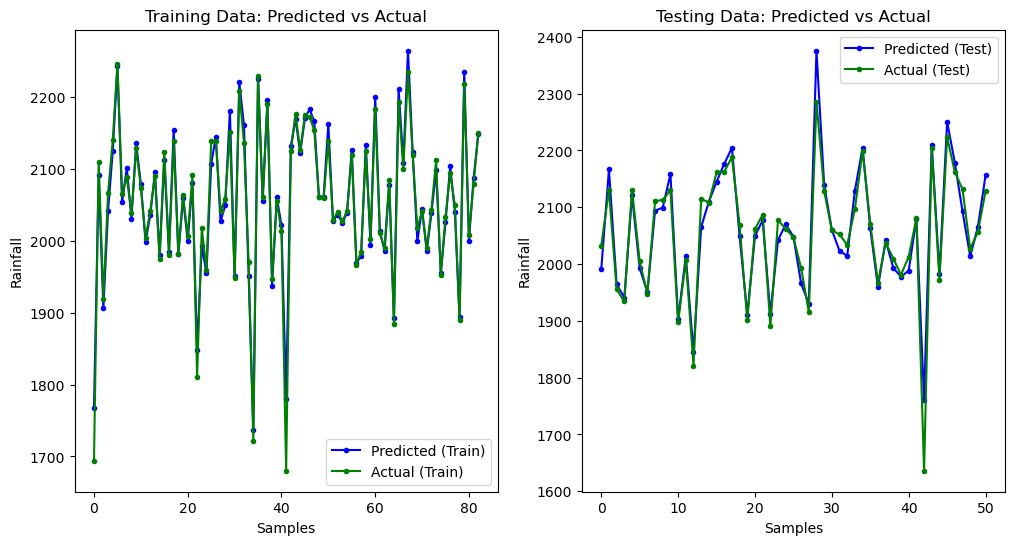

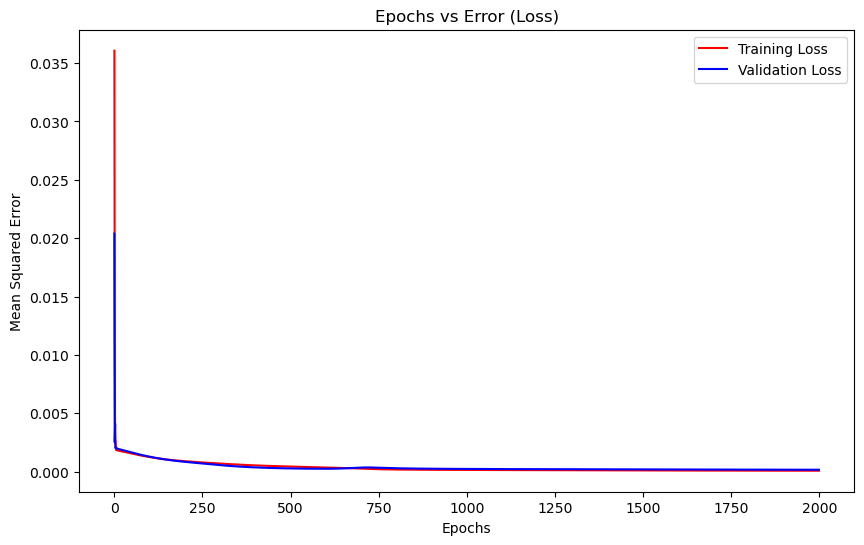

In [20]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 6
dataset = July_Data_all[1]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp2_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp2_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp2_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp2_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp2_predictions_train)
mean_act_train = np.mean(bp2_actual_train)
sd_pred_train = np.std(bp2_predictions_train)
sd_act_train = np.std(bp2_actual_train)
cc_train = np.corrcoef(bp2_predictions_train.flatten(), bp2_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp2_predictions_train - bp2_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp2_predictions_test)
mean_act_test = np.mean(bp2_actual_test)
sd_pred_test = np.std(bp2_predictions_test)
sd_act_test = np.std(bp2_actual_test)
cc_test = np.corrcoef(bp2_predictions_test.flatten(), bp2_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp2_predictions_test - bp2_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp2_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp2_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp2_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp2_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


In [17]:
print(bp2_predictions_train.shape)
print(bp2_predictions_test.shape)

(84,)
(50,)


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 2004.5433974422422
Mean Predicted: 2002.5836181640625
SD Observed: 97.361110827139
SD Predicted: 94.19954681396484
Correlation Coefficient (CC): 0.9923698883271974
Root Mean Squared Error (RMSE): 12.401355819925742
Percentage Bias (PP): 0.09776686704215568%

Testing Data:
Mean Observed: 1996.536819017203
Mean Predicted: 1996.1822509765625
SD Observed: 104.91354623551184
SD Predicted: 92.73238372802734
Correlation Coefficient (CC): 0.9677238219132849
Root Mean Squared Error (RMSE): 27.86626607154528
Percentage Bias (PP): 0.01775915361355829%


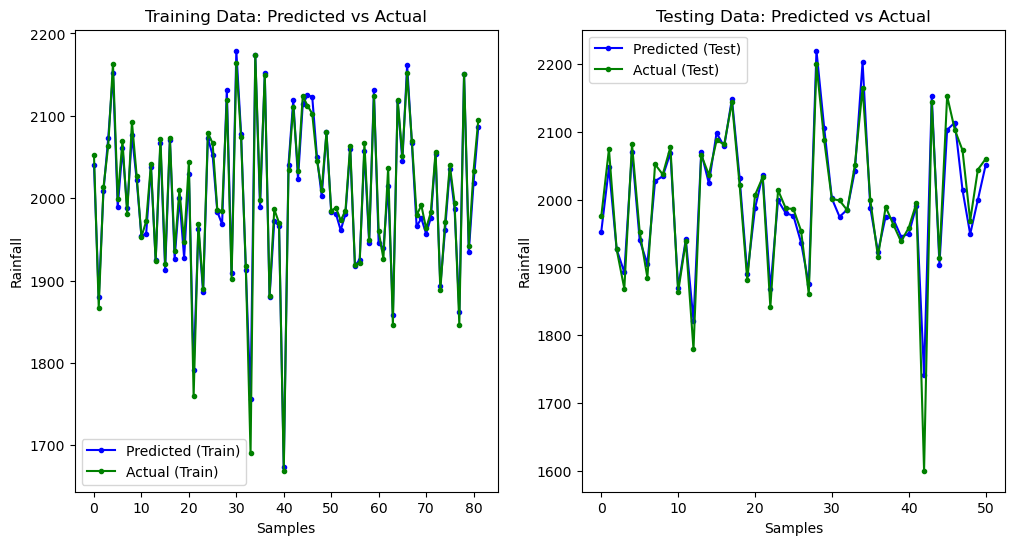

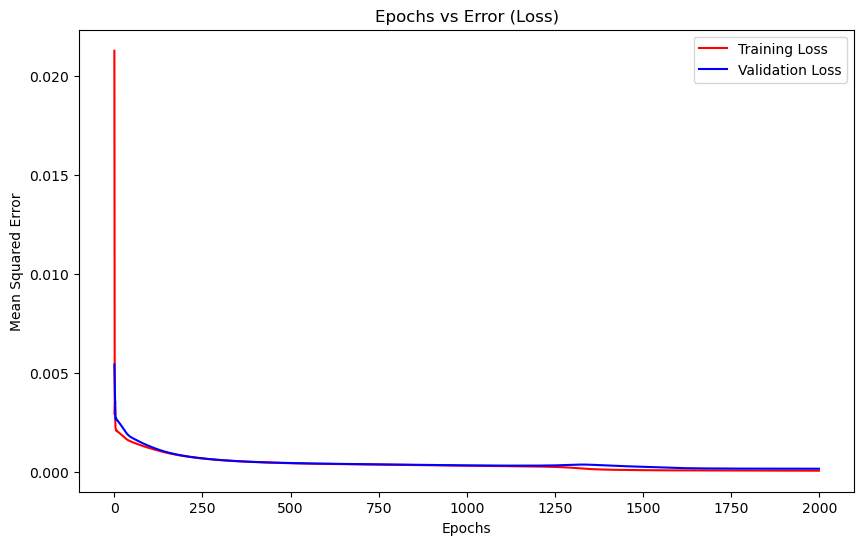

In [21]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 7
dataset = July_Data_all[2]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp3_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp3_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp3_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp3_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp3_predictions_train)
mean_act_train = np.mean(bp3_actual_train)
sd_pred_train = np.std(bp3_predictions_train)
sd_act_train = np.std(bp3_actual_train)
cc_train = np.corrcoef(bp3_predictions_train.flatten(), bp3_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp3_predictions_train - bp3_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp3_predictions_test)
mean_act_test = np.mean(bp3_actual_test)
sd_pred_test = np.std(bp3_predictions_test)
sd_act_test = np.std(bp3_actual_test)
cc_test = np.corrcoef(bp3_predictions_test.flatten(), bp3_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp3_predictions_test - bp3_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp3_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp3_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp3_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp3_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


In [20]:
print(bp3_predictions_train.shape)
print(bp3_predictions_test.shape)

(83,)
(50,)


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training Data:
Mean Observed: 1958.5723093098509
Mean Predicted: 1964.2110595703125
SD Observed: 91.63232092699423
SD Predicted: 87.72393035888672
Correlation Coefficient (CC): 0.9830909226903711
Root Mean Squared Error (RMSE): 17.858116121856366
Percentage Bias (PP): -0.28790105086539114%

Testing Data:
Mean Observed: 1951.4533382642865
Mean Predicted: 1964.6812744140625
SD Observed: 99.14970704949377
SD Predicted: 90.98329162597656
Correlation Coefficient (CC): 0.9219070335943842
Root Mean Squared Error (RMSE): 40.627713450549585
Percentage Bias (PP): -0.6778504968784744%


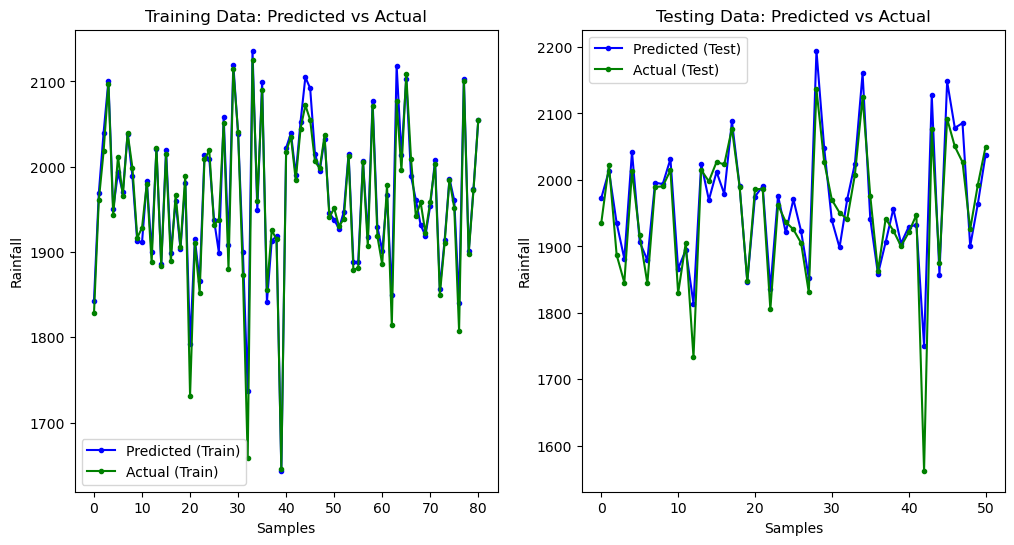

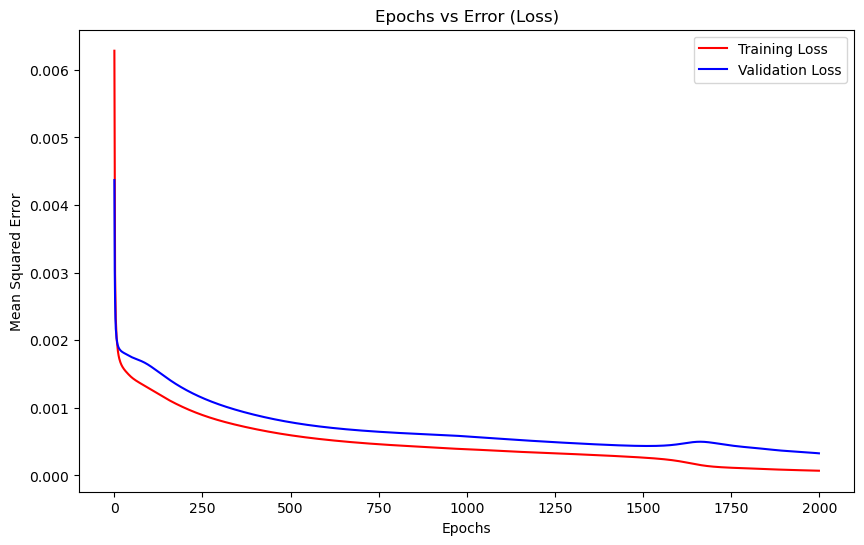

In [22]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 8
dataset = July_Data_all[3]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp4_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp4_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp4_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp4_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp4_predictions_train)
mean_act_train = np.mean(bp4_actual_train)
sd_pred_train = np.std(bp4_predictions_train)
sd_act_train = np.std(bp4_actual_train)
cc_train = np.corrcoef(bp4_predictions_train.flatten(), bp4_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp4_predictions_train - bp4_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp4_predictions_test)
mean_act_test = np.mean(bp4_actual_test)
sd_pred_test = np.std(bp4_predictions_test)
sd_act_test = np.std(bp4_actual_test)
cc_test = np.corrcoef(bp4_predictions_test.flatten(), bp4_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp4_predictions_test - bp4_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp4_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp4_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp4_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp4_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


In [22]:
print(bp4_predictions_train.shape)
print(bp4_predictions_test.shape)

(82,)
(50,)


1
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training Data:
Mean Observed: 1921.9046792104436
Mean Predicted: 1948.0003662109375
SD Observed: 88.91019450786447
SD Predicted: 88.19397735595703
Correlation Coefficient (CC): 0.9702106669311568
Root Mean Squared Error (RMSE): 33.89206606970483
Percentage Bias (PP): -1.357803395911106%

Testing Data:
Mean Observed: 1912.9044633291714
Mean Predicted: 1949.1717529296875
SD Observed: 95.4990842247827
SD Predicted: 81.69770812988281
Correlation Coefficient (CC): 0.8867880955264553
Root Mean Squared Error (RMSE): 57.204566386190045
Percentage Bias (PP): -1.8959279094052277%


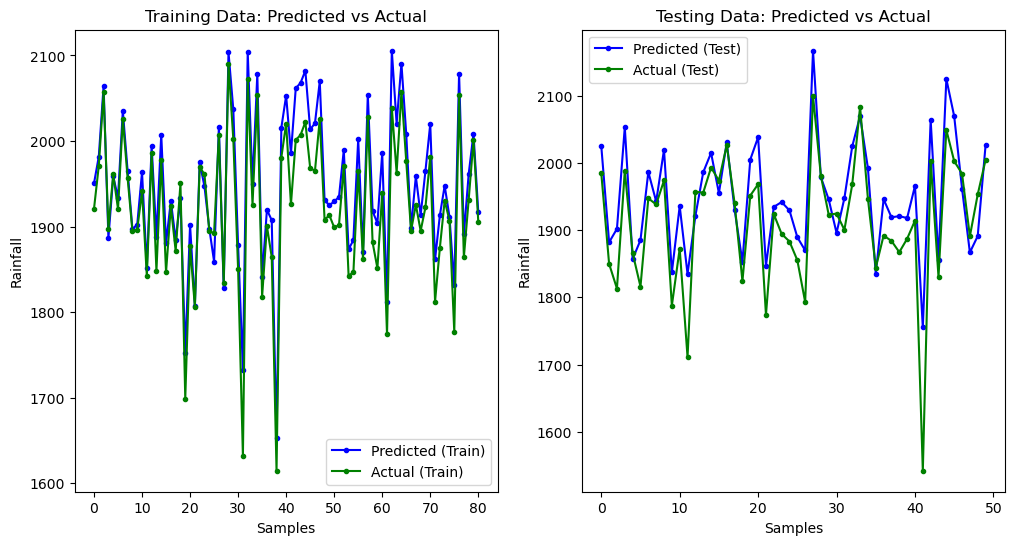

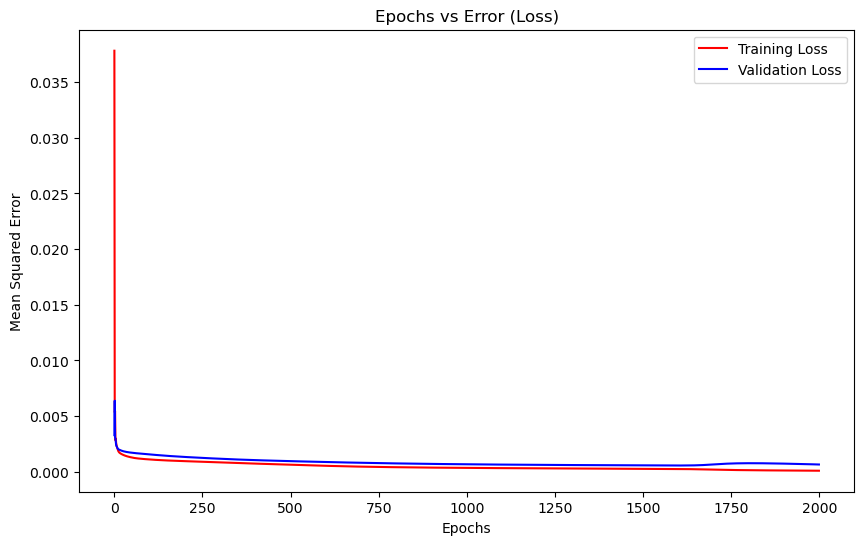

In [23]:
# Set random seeds
np.random.seed(2)
tf.random.set_seed(2)

# Define the number of layers and load the dataset
Layers = 9
dataset = July_Data_all[4]

# Prepare the input features and labels
X = dataset.iloc[:, 0:Layers+1].values
X = preprocessing.normalize(X)

y = X[:, Layers]
X = X[:, 0:Layers]

min_values = dataset.iloc[:, 0:Layers+1].min()
max_values = dataset.iloc[:, 0:Layers+1].max()

# Reshape X to be 3D for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
split_index = int(0.62 * len(X))  

# Sequentially split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

pm = X.shape[1]
print(X.shape[1])
# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape in the Input layer
model.add(LSTM(units=Layers+1, kernel_initializer=Sivanandam(pm), activation='tanh'))  # Replace 'Sivanandam' with a standard initializer like glorot_uniform
model.add(Dense(units=1, kernel_initializer=Sivanandam(pm),activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False,
    # callbacks=[early_stopping]  # Add early stopping callback
)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match the shape of y_train and y_test
y_train_pred = np.reshape(y_train_pred, y_train.shape)
y_test_pred = np.reshape(y_test_pred, y_test.shape)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test_pred - y_test) ** 2))

bp5_predictions_train = y_train_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp5_actual_train = y_train * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

bp5_predictions_test = y_test_pred * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']
bp5_actual_test = y_test * (max_values['t-0'] - min_values['t-0']) + min_values['t-0']

# Calculating statistics for training data
mean_pred_train = np.mean(bp5_predictions_train)
mean_act_train = np.mean(bp5_actual_train)
sd_pred_train = np.std(bp5_predictions_train)
sd_act_train = np.std(bp5_actual_train)
cc_train = np.corrcoef(bp5_predictions_train.flatten(), bp5_actual_train.flatten())[0, 1]
rmse_train = np.sqrt(np.mean((bp5_predictions_train - bp5_actual_train) ** 2))
pp_train = 100 * (mean_act_train - mean_pred_train) / mean_act_train

# Calculating statistics for testing data
mean_pred_test = np.mean(bp5_predictions_test)
mean_act_test = np.mean(bp5_actual_test)
sd_pred_test = np.std(bp5_predictions_test)
sd_act_test = np.std(bp5_actual_test)
cc_test = np.corrcoef(bp5_predictions_test.flatten(), bp5_actual_test.flatten())[0, 1]
rmse_test = np.sqrt(np.mean((bp5_predictions_test - bp5_actual_test) ** 2))
pp_test = 100 * (mean_act_test - mean_pred_test) / mean_act_test

# Output the results for training data
print(f"Training Data:")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"SD Observed: {sd_act_train}")
print(f"SD Predicted: {sd_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output the results for testing data
print(f"\nTesting Data:")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"SD Observed: {sd_act_test}")
print(f"SD Predicted: {sd_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Predicted vs Actual Results for Training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bp5_predictions_train, '.-', color='blue', label='Predicted (Train)')
plt.plot(bp5_actual_train, '.-', color='green', label='Actual (Train)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Training Data: Predicted vs Actual')
plt.legend()

# Plotting Predicted vs Actual Results for Testing data
plt.subplot(1, 2, 2)
plt.plot(bp5_predictions_test, '.-', color='blue', label='Predicted (Test)')
plt.plot(bp5_actual_test, '.-', color='green', label='Actual (Test)')
plt.xlabel('Samples')
plt.ylabel('Rainfall')
plt.title('Testing Data: Predicted vs Actual')
plt.legend()

plt.show()

# Plotting Epochs vs Error (Loss) for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs Error (Loss)')
plt.legend()
plt.show()


In [24]:
print(bp5_predictions_train.shape)
print(bp5_predictions_test.shape)

(81,)
(50,)


In [24]:
print("bp1 shape train",bp1_predictions_train.shape)
print("bp2 shape train",bp2_predictions_train.shape)
print("bp3 shape train",bp3_predictions_train.shape)
print("bp4 shape train",bp4_predictions_train.shape)
print("bp5 shape train",bp5_predictions_train.shape)


print("bp1 shape test",bp1_predictions_test.shape)
print("bp2 shape test",bp2_predictions_test.shape)
print("bp3 shape test",bp3_predictions_test.shape)
print("bp4 shape test",bp4_predictions_test.shape)
print("bp5 shape test",bp5_predictions_test.shape)


bp1 shape train (83,)
bp2 shape train (83,)
bp3 shape train (82,)
bp4 shape train (81,)
bp5 shape train (81,)
bp1 shape test (52,)
bp2 shape test (51,)
bp3 shape test (51,)
bp4 shape test (51,)
bp5 shape test (50,)


Training Data Statistics (Ensemble):
Mean Observed: 2121.6919874535834
Mean Predicted: 2095.219482421875
Root Mean Squared Error (RMSE): 88.63758475284689
Standard Deviation Observed: 119.15763956559636
Standard Deviation Predicted: 73.38687133789062
Correlation Coefficient (CC): 0.710628713094254
Percentage Bias (PP): 1.2477072632715258%

Testing Data Statistics (Ensemble):
Mean Observed: 2120.7916322647798
Mean Predicted: 2073.232012235201
Root Mean Squared Error (RMSE): 173.26925331433438
Standard Deviation Observed: 118.56404087602205
Standard Deviation Predicted: 156.696419714012
Correlation Coefficient (CC): 0.2920270095580005
Percentage Bias (PP): 2.2425409128378146%


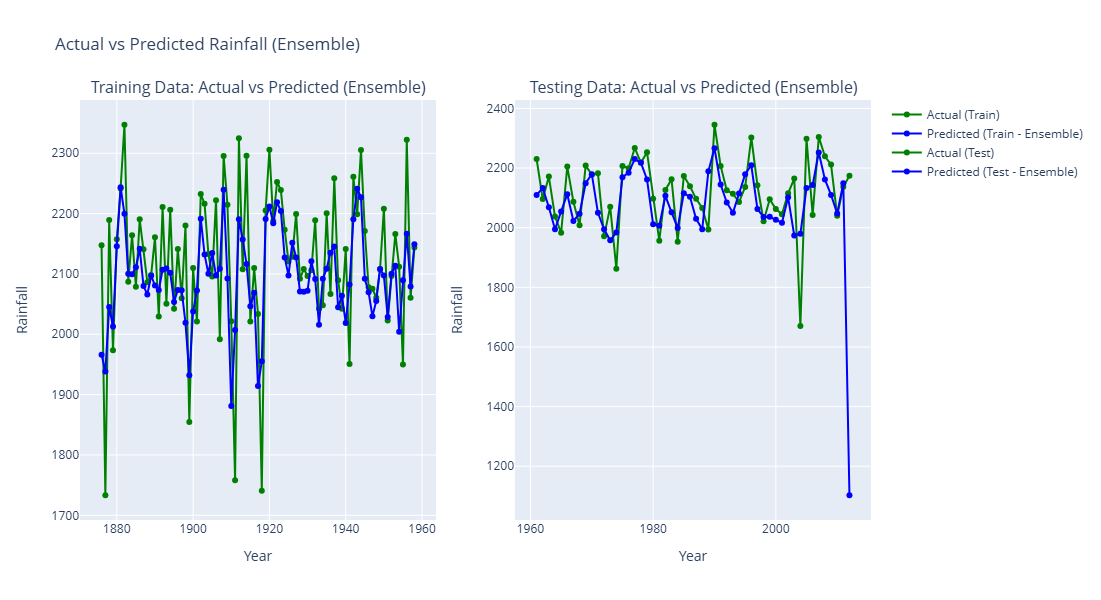

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a range of years for training and testing
train_years = np.arange(1876, 1876 + 83)  # Training data for 83 entries
test_years = np.arange(1961, 1961 + 52)   # Testing data for 52 entries

# Pad the prediction arrays to align their lengths for training (83 entries)
bp1_pred_train = bp1_predictions_train.flatten()[:83] 
bp2_pred_train = bp2_predictions_train.flatten()[:83]
bp3_pred_train = np.concatenate([np.zeros(1), bp3_predictions_train.flatten()])[:83]  # Pad with 1 zero
bp4_pred_train = np.concatenate([np.zeros(2), bp4_predictions_train.flatten()])[:83]  # Pad with 2 zeros
bp5_pred_train = np.concatenate([np.zeros(2), bp5_predictions_train.flatten()])[:83]  # Pad with 2 zeros

# Create the ensemble for training by averaging the predictions
ensemble_train = np.mean([bp1_pred_train, bp2_pred_train], axis=0)

# Store the training predictions and actual values in a DataFrame
df_train = pd.DataFrame({
    'Year': train_years,
    'Actual': bp1_actual_train.flatten()[:83],  # Assuming all models have the same actual values
    'BP1': bp1_pred_train,
    'BP2': bp2_pred_train,
    'BP3': bp3_pred_train,
    'BP4': bp4_pred_train,
    'BP5': bp5_pred_train,
    'Ensemble': ensemble_train
})

# Pad the prediction arrays to align their lengths for testing (52 entries)
bp1_pred_test = bp1_predictions_test.flatten()[:52]
bp2_pred_test = np.concatenate([bp2_predictions_test.flatten(), np.zeros(1)])[:52]  # Pad with 1 zero
bp3_pred_test = np.concatenate([bp3_predictions_test.flatten(), np.zeros(1)])[:52]  # Pad with 1 zero
bp4_pred_test = np.concatenate([bp4_predictions_test.flatten(), np.zeros(1)])[:52]  # Pad with 1 zero
bp5_pred_test = np.concatenate([bp5_predictions_test.flatten(), np.zeros(2)])[:52]  # Pad with 2 zeros

# Create the ensemble for testing by averaging the predictions
ensemble_test = np.mean([bp1_pred_test, bp2_pred_test], axis=0)

# Store the testing predictions and actual values in a DataFrame
df_test = pd.DataFrame({
    'Year': test_years,
    'Actual': bp1_actual_test.flatten()[:52],
    'BP1': bp1_pred_test,
    'BP2': bp2_pred_test,
    'BP3': bp3_pred_test,
    'BP4': bp4_pred_test,
    'BP5': bp5_pred_test,
    'Ensemble': ensemble_test
})

# Function to calculate statistics: Mean, RMSE, Std Dev, CC, PP
def calculate_statistics(actual, predicted):
    mean_act = np.mean(actual)
    mean_pred = np.mean(predicted)
    rmse = np.sqrt(np.mean((predicted - actual) ** 2))
    std_act = np.std(actual)
    std_pred = np.std(predicted)
    cc = np.corrcoef(predicted.values.flatten(), actual.values.flatten())[0, 1]
    pp = 100 * (mean_act - mean_pred) / mean_act
    return mean_act, mean_pred, rmse, std_act, std_pred, cc, pp

# Calculate statistics for training data (ensemble)
mean_act_train, mean_pred_train, rmse_train, std_act_train, std_pred_train, cc_train, pp_train = calculate_statistics(df_train['Actual'], df_train['Ensemble'])

# Calculate statistics for testing data (ensemble)
mean_act_test, mean_pred_test, rmse_test, std_act_test, std_pred_test, cc_test, pp_test = calculate_statistics(df_test['Actual'], df_test['Ensemble'])

# Output statistics for training data
print("Training Data Statistics (Ensemble):")
print(f"Mean Observed: {mean_act_train}")
print(f"Mean Predicted: {mean_pred_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Standard Deviation Observed: {std_act_train}")
print(f"Standard Deviation Predicted: {std_pred_train}")
print(f"Correlation Coefficient (CC): {cc_train}")
print(f"Percentage Bias (PP): {pp_train}%")

# Output statistics for testing data
print("\nTesting Data Statistics (Ensemble):")
print(f"Mean Observed: {mean_act_test}")
print(f"Mean Predicted: {mean_pred_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Standard Deviation Observed: {std_act_test}")
print(f"Standard Deviation Predicted: {std_pred_test}")
print(f"Correlation Coefficient (CC): {cc_test}")
print(f"Percentage Bias (PP): {pp_test}%")

# Plotting Actual vs Predicted for Training (Ensemble)
fig = make_subplots(rows=1, cols=2, subplot_titles=("Training Data: Actual vs Predicted (Ensemble)", "Testing Data: Actual vs Predicted (Ensemble)"))

# Training Data: Actual vs Predicted
fig.add_trace(
    go.Scatter(
        x=df_train['Year'],
        y=df_train['Actual'],
        mode='lines+markers',
        name='Actual (Train)',
        line=dict(color='green')
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=df_train['Year'],
        y=df_train['Ensemble'],
        mode='lines+markers',
        name='Predicted (Train - Ensemble)',
        line=dict(color='blue')
    ),
    row=1, col=1
)

# Testing Data: Actual vs Predicted
fig.add_trace(
    go.Scatter(
        x=df_test['Year'],
        y=df_test['Actual'],
        mode='lines+markers',
        name='Actual (Test)',
        line=dict(color='green')
    ),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(
        x=df_test['Year'],
        y=df_test['Ensemble'],
        mode='lines+markers',
        name='Predicted (Test - Ensemble)',
        line=dict(color='blue')
    ),
    row=1, col=2
)

# Update layout for titles and axis labels
fig.update_layout(
    height=600, width=1200,
    title_text="Actual vs Predicted Rainfall (Ensemble)",
    showlegend=True
)

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_yaxes(title_text="Rainfall", row=1, col=1)
fig.update_yaxes(title_text="Rainfall", row=1, col=2)

# Display the figure
fig.show()